In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../../../../data/suicide_rates.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
#df.loc[df['country'].str.startswith('U')]

CountryU = df[df['country'].apply(lambda x: x.startswith('U'))]

In [6]:
CountryU['country'].unique()

array(['Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

In [7]:
US = df.loc[df['country'].str.contains('United States')]

In [8]:
df.groupby('age')['suicides_no'].sum()

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

In [9]:
df['age'] = df['age'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null category
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 2.4+ MB


In [59]:
age_cats = list(df['age'].cat.categories)
#age_cats.remove('5-14 years')
#age_cats = ['5-14 years'] + age_cats

age_cats.insert(0, age_cats.pop(age_cats.index('5-14 years')))


['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [60]:
df['age'].cat.categories

Index(['5-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'],
      dtype='object')

In [11]:
df['age'] = df['age'].cat.reorder_categories(age_cats)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null category
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 2.4+ MB


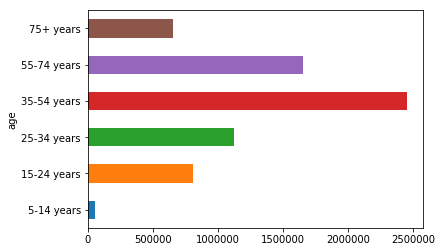

In [13]:
df.groupby('age')['suicides_no'].sum().plot(kind='barh')
plt.savefig('warm-up2_2.pdf')

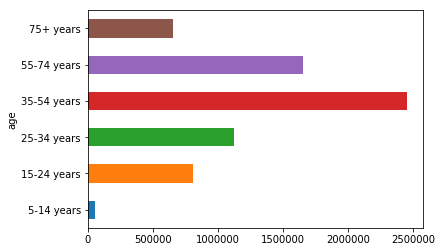

In [48]:
df.groupby('age')['suicides_no'].agg('sum').plot(kind='barh')

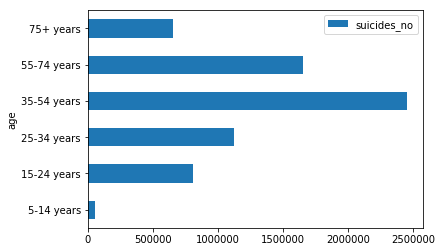

In [51]:
df.groupby('age').agg({'suicides_no': 'sum'}).plot(kind='barh')

In [63]:
adf = df.groupby('age').agg({'suicides_no': ['sum', 'mean'], 'population': ['sum', 'mean']})

In [64]:
adf

suicides_no               population              
                    sum        mean          sum          mean
age                                                           
5-14 years        52264   11.337093   8398693237  1.821842e+06
15-24 years      808542  174.179664   8642946896  1.861902e+06
25-34 years     1123912  242.118053   8438103587  1.817773e+06
35-54 years     2452141  528.250969  14375888123  3.096917e+06
55-74 years     1658443  357.269065   8803245340  1.896434e+06
75+ years        653118  140.697544   2663281253  5.737357e+05

In [68]:
adf.columns

MultiIndex(levels=[['suicides_no', 'population'], ['sum', 'mean']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])